## Using networkx

For this network you should execute the first cell before going on to explore the
others.  Uncomment out `%matplotlib inline` if you want all your graphs to appear in the notebook and not in a separate window.  If you choose to have them in a separate window, be aware that if didn't start the notebook with the `--pylab` flag, you will have to execute `plt.show()` to get the graphs to appear on your screen, even after having given a `draw` command.

Some of the graph used in this notebook include: [homer.gml, ](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/assignments/homer.gml)
[anna.gml, ](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/assignments/anna.gml)
[lesmiserables.gml, ](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/assignments/lesmiserables.gml)
[polblogs.gml, ](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/assignments/polblogs.gml) and
[an anonymized ego network. ](http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/assignments/personal_ego_network_anon.gml)   These come with the zipfile in which the notebook is  distributed.

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
try:
    G=nx.complete_graph(5)
    pos1 = nx.graphviz_layout(G,prog='neato')
    use_graphviz = True
except:
    use_graphviz = False

If you want to have your graphs appear in the matplotlib graph GUI,
then comment
out the matplotlib inline command above and start ipython notebook
up with the pylab flag.  If you do that, 
then they won't appear inline as they do in the distributed version
of the notebook.  If you have a Mac, then in the latest version
of matplotlib, you also need to uncomment out the code in the following cell and execute it.  Non Mac users should leave this commented out.

Let's read in the karate network from

> Zachary, W. W. 1977. "An information flow model for conflict and fission in small groups." Journal of anthropological research, 452-473.

We'll draw it with a  circular layout, and save the results in the image file
*networkx_circular_karate.png*.  We'll be reading in the builtin networkx version of the karate graph, rather than the one distributed in the gml file above.  The only difference is that the networkx version has node attributes identifying what faction each 
member belongs to.  That will be important in drawing an informative graph.

In [45]:
kn = nx.karate_club_graph()
# We'll try a force spring layout algorithm.
nx.draw_spring(kn)
# A different layout
#nx.draw_circular(kn)
# The default drawing program.
#nx.draw_networkx(kn)
# Saving the figure to a file (only after drawing it)
plt.savefig('networkx_spring_karate.png')

In [46]:
plt.show()

In [47]:
%qtconsole

/Users/gawron/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [ ]:
kn.node[0]

In [ ]:
plt.show()

In [48]:
nx.draw_circular(kn)
plt.savefig('networkx_circular_karate.png')

A very popular and useful graph drawing program (not written in Python) is called `Graphviz`.  You can install Graphviz on your local machine with [this link](http://www.graphviz.org/).  To save any `networkx` graph in a file format graphviz can read, do the following:

In [49]:
nx.write_dot(kn,'networkx_karate.dot')

In [50]:
nx.draw_spectral(kn)
plt.savefig('networkx_spectral_karate.png')

Now let's compute some centrality information about the karate graph.  First **degree centrality**.

In [51]:
D = nx.degree_centrality(kn)

In [52]:
kn.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 32),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 10),
 (4, 6),
 (5, 16),
 (5, 10),
 (5, 6),
 (6, 16),
 (8, 32),
 (8, 30),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 32),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 33),
 (26, 29),
 (27, 33),
 (28, 33),
 (28, 31),
 (29, 32),
 (29, 33),
 (30, 33),
 (30, 32),
 (31, 33),
 (31, 32),
 (32, 33)]

In [ ]:
D

`D` is just a dictionary assigning a centrality score to each node.  This is great but often we're interested in the **ranking** of nodes by centrality scores.  We need a data structure caoable of representing order, so we turn the dictionary into a list of pairs with the `items` method.  We sort that list, paying attention only to the second member of each pair (the centrality score), reversing the the ranking so that the most central node comes **first**.  Then we look.

In [ ]:
D.items()

In [53]:
D_il = D.items()
D_il.sort(key=lambda x:x[1],reverse=True)
#D_il.sort()
D_il

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152),
 (13, 0.15151515151515152),
 (23, 0.15151515151515152),
 (5, 0.12121212121212122),
 (6, 0.12121212121212122),
 (7, 0.12121212121212122),
 (27, 0.12121212121212122),
 (29, 0.12121212121212122),
 (30, 0.12121212121212122),
 (4, 0.09090909090909091),
 (10, 0.09090909090909091),
 (19, 0.09090909090909091),
 (24, 0.09090909090909091),
 (25, 0.09090909090909091),
 (28, 0.09090909090909091),
 (9, 0.06060606060606061),
 (12, 0.06060606060606061),
 (14, 0.06060606060606061),
 (15, 0.06060606060606061),
 (16, 0.06060606060606061),
 (17, 0.06060606060606061),
 (18, 0.06060606060606061),
 (20, 0.06060606060606061),
 (21, 0.06060606060606061),
 (22, 0.06060606060606061),
 (26, 0.06060606060606061),
 (11, 0.030303030303030304)]

Same technique, different kind of centrality, yielding different results.

In [54]:
B = nx.betweenness_centrality(kn)
B_il = B.items()
B_il.sort(key=lambda x:x[1],reverse=True)
B_il

[(0, 0.4376352813852815),
 (33, 0.304074975949976),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374),
 (6, 0.029987373737373736),
 (27, 0.02233345358345358),
 (23, 0.017613636363636363),
 (30, 0.014411976911976907),
 (3, 0.011909271284271283),
 (25, 0.0038404882154882154),
 (29, 0.0029220779220779218),
 (24, 0.0022095959595959595),
 (28, 0.0017947330447330447),
 (9, 0.0008477633477633478),
 (4, 0.0006313131313131313),
 (10, 0.0006313131313131313),
 (7, 0.0),
 (11, 0.0),
 (12, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (26, 0.0)]

Now let's do `betweenness centrality` again for a different kind of object, edges instead of nodes.  It's edge centrality that is used in the Girvan Newman algorithm discussed in the online book.

In [55]:
eb = nx.edge_betweenness_centrality(kn)

In [56]:
eb_il = eb.items()

sorted(eb_il,key=lambda x: x[1], reverse=True)

[((0, 31), 0.12725999490705373),
 ((0, 6), 0.07813428401663694),
 ((0, 5), 0.07813428401663694),
 ((0, 2), 0.0777876807288572),
 ((0, 8), 0.07423959482783014),
 ((2, 32), 0.06898678663384543),
 ((13, 33), 0.06782389723566191),
 ((19, 33), 0.0593823387941035),
 ((0, 11), 0.058823529411764705),
 ((26, 33), 0.0542908072319837),
 ((31, 33), 0.05339388280564752),
 ((0, 4), 0.0522875816993464),
 ((0, 10), 0.0522875816993464),
 ((0, 12), 0.04652406417112299),
 ((0, 19), 0.045936960642843),
 ((0, 13), 0.0423718982542512),
 ((25, 31), 0.04205783323430383),
 ((31, 32), 0.041433947316300256),
 ((2, 27), 0.04119203236850297),
 ((8, 33), 0.04043657867187279),
 ((0, 17), 0.04012392835922248),
 ((0, 21), 0.040123928359222474),
 ((24, 31), 0.040106951871657755),
 ((15, 33), 0.03473955238661121),
 ((18, 33), 0.03473955238661121),
 ((14, 33), 0.03473955238661121),
 ((22, 33), 0.03473955238661121),
 ((20, 33), 0.03473955238661121),
 ((23, 33), 0.03266983561101209),
 ((1, 30), 0.032280791104320514),
 ((2,

Here's the Python code implementing the heart of Girvan-Newman.

In [57]:
## Simulating a step in Girvan-Newman method.  Remove the highest betweenness edge. Recalculate
## edge betweenness.
#kn.remove_edge(1,32)
eb2 = nx.edge_betweenness_centrality(kn)
eb_il2 = eb2.items()
(start,end) = sorted(eb_il2,key=lambda x: x[1], reverse=True)[0][0]
kn.remove_edge(start,end)
components = nx.connected_component_subgraphs(kn)
print len(list(components))
components

1


<generator object connected_component_subgraphs at 0x146b65230>

In [58]:
components = nx.connected_component_subgraphs(kn)
list(components)

In [ ]:
len(kn)

So we didnt succeed in splitting the graph in two by snipping this edge.  This means we try again if we're
doing the full algorithm, recomputing all the betweenness centrality numbers, fnding the best scoring edge, 
and snipping that.  But we leave that part an an exercise.

In [ ]:
components

## Information about Nodes

As we said above, the reason for loading up the networkx definition of the karate club graph was that it contained information about the faction of each node, information taken from Zachary's original paper.  This is stored as a **node attribute**.  Most interesting network applications will involve doing some computing with node attributes.  In `networkx`, node attributes are stored in a dictionary which is an attrribute of the graph:

In [59]:
node_dict = kn.node
kn.node[32]['club']

'Officer'

## Customized drawing

Almost all complex graphs will benefit from some kind of customization when drawing them.  For example, the layout algorith does not take labeling into account, so that adding labels to a graph may result in a cluttered, even unreadable, graph.  You can deal with this by leaving some nodes out, or by leaving some edges out, adjusting label size and position, or by factoring some of the information into coloring.  In all cases you need to break the drawing process up into component steps, which allows you to customize some or all of them.  The following code illustrates some of the ideas.

There are basically four steps:
  1.  Compute the basic layout.  This creates a layout object we'll call `pos`,  used in the next steps
  2.  Draw the node labels  for `pos`(optional)
  3.  Draw the nodes for `pos`, possibly with coloring, and possibly with special outlining
  4.  Draw the edges for `pos`, connecting the nodes.
These correspond to the following functions:

  ```python
  nx.spring_layout
  nx.draw_networkx_labels
  nx.draw_networkx_nodes
  nx.draw_networkx edges
  ```

In [60]:
import matplotlib.pyplot as plt
    
import networkx as nx

G=nx.cubical_graph() 
pos=nx.spring_layout(G) # positions for all nodes

# Try some other layout algorithms!
# graphviz variants will only work if you have graphviz installed 
# via link given above.
#pos = nx.circular_layout(G)
#pos = nx.graphviz_layout(G,prog='twopi')
#pos = nx.graphviz_layout(G,prog='sfdp')
#pos = nx.graphviz_layout(G,prog='neato')

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
		       alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7],
                       node_color='c',
                       node_size=500,
		       alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=14)

plt.axis('off')
plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

## Customized drawing example

The next cell shows various ways of customizing the karate graph. 
  
In particular, the steps shown are those needed to produce the colored FG layout figure in the lecture notes. Some of the commented out lines show experiments you could try.

In [61]:
import math

kn = nx.karate_club_graph()

# Keep both communities the same color for pictures not coloring the communities.
#club_colors = ('red','red') 
#Some alternative color schemes
#club_colors = ('lightgray','salmon')
#club_colors = ('lightblue','salmon')
#club_colors = ('yellow','lightgreen')
club_colors = ('#00CCFF','#FF0033')
clubs = ('Officer', 'Mr. Hi')
# A dictionary that maps from a club to the club color.
color_dict = dict(zip(clubs, club_colors))
# node_dict[n]['club'] is the club for node n.
node_dict = kn.node 
default_distance_between_nodes = 2.0/(math.sqrt(len(kn)))

# Now using Zachary's data, make a list of colors to be used to color 
# each node based on the faction of that node (according to Zachary)

node_color = [color_dict[node_dict[n]['club']] 
              for n in range(len(kn.nodes()))]

# Draw the network with no labels, itsy-bitsy nodes
#pos = nx.spring_layout(kn,scale=1.0)
pos = nx.spring_layout(kn,k=1*default_distance_between_nodes)
nx.draw_networkx(kn,pos, with_labels=False,node_size=50,node_color="lightgray")  #Default node size=300

#default_distance_between_nodes = 1.0/math.sqrt(len(kn.nodes()))
#pos = nx.spring_layout(kn,scale=1.0,k=2*default_distance_between_nodes)
#pos = nx.spring_layout(kn,scale=2.0)

#Now put in the labels, using a label->new_label mapping. We'll change the labels to agree with
# Zachary's original indexing, so x->x+1
new_labels = dict((x,x + 1) for x in kn.nodes())
font_size = 12
## ha/va not working
nx.draw_networkx_labels(kn,pos,new_labels,
                        font_size=font_size,
                        font_color='black',
                        verticalalignment='center',
                        ha = 'center',
                        fontsize = 8)
# Highlight the two leader nodes, by drawing slightly larger black circles round them.
nx.draw_networkx_nodes(kn,pos,{0:0,33:33},
                       font_size=font_size,
                       node_color=['black','black'],node_size=500)
# Now draw all the nodes, including leaders, using faction color scheme.
nx.draw_networkx_nodes(kn,pos,new_labels,
                       node_color=node_color,node_size=350)
# Put in the edges
nx.draw_networkx_edges(kn,pos)
plt.show()

In [62]:
kn.edge

{0: {1: {},
  2: {},
  3: {},
  4: {},
  5: {},
  6: {},
  7: {},
  8: {},
  10: {},
  11: {},
  12: {},
  13: {},
  17: {},
  19: {},
  21: {},
  31: {}},
 1: {0: {}, 2: {}, 3: {}, 7: {}, 13: {}, 17: {}, 19: {}, 21: {}, 30: {}},
 2: {0: {}, 1: {}, 3: {}, 7: {}, 8: {}, 9: {}, 13: {}, 27: {}, 28: {}, 32: {}},
 3: {0: {}, 1: {}, 2: {}, 7: {}, 12: {}, 13: {}},
 4: {0: {}, 6: {}, 10: {}},
 5: {0: {}, 6: {}, 10: {}, 16: {}},
 6: {0: {}, 4: {}, 5: {}, 16: {}},
 7: {0: {}, 1: {}, 2: {}, 3: {}},
 8: {0: {}, 2: {}, 30: {}, 32: {}, 33: {}},
 9: {2: {}, 33: {}},
 10: {0: {}, 4: {}, 5: {}},
 11: {0: {}},
 12: {0: {}, 3: {}},
 13: {0: {}, 1: {}, 2: {}, 3: {}, 33: {}},
 14: {32: {}, 33: {}},
 15: {32: {}, 33: {}},
 16: {5: {}, 6: {}},
 17: {0: {}, 1: {}},
 18: {32: {}, 33: {}},
 19: {0: {}, 1: {}, 33: {}},
 20: {32: {}, 33: {}},
 21: {0: {}, 1: {}},
 22: {32: {}, 33: {}},
 23: {25: {}, 27: {}, 29: {}, 32: {}, 33: {}},
 24: {25: {}, 27: {}, 31: {}},
 25: {23: {}, 24: {}, 31: {}},
 26: {29: {}, 33: {}

## Watts-Strogatz graphs

In [63]:
import networkx as nx
#watts_strogatz_graph(n,k,p,seed)
# k=Number of neighbors each node connects to initially
# p= probability of reconnection. p=0 an ordered graph, p=1 random.
(n,k,p) = (15,4,.15)
g_ran = nx.watts_strogatz_graph(n,k, 1.0, 5)
g_ws = nx.watts_strogatz_graph(n,k, p, 5)
g_ordered = nx.watts_strogatz_graph(15,k, 0, 5)
#g_ordered = nx.newman_watts_strogatz_graph(n,k, 0.0, 5)
#g_ordered = nx.havel_hakimi_graph([4]*25)
nx.draw_circular(g_ws)

In [65]:
nx.draw_circular(g_ran)

In [67]:
#g_ordered = nx.watts_strogatz_graph(15,k, 0, 5)
# Need graohviz installed for the following to work
#pos=nx.graphviz_layout(g_ordered,prog='circo')
#nx.draw_networkx(g_ordered,pos=pos)
nx.draw_circular(g_ordered)

## The clustering coefficient of a random graph

`Networkx` provides a clustering function that takes a graph and sequence of nodes in that graph and returns a dictionary each of the given nodes with its clustering coefficient.  The average clustering coefficient of the graph is just the sum of the values of the coefficients for all the nodes divided by the number of nodes.

In [ ]:
G = nx.erdos_renyi_graph(100,0.11)
nx.draw_spring(G)

In [ ]:
G = nx.erdos_renyi_graph(100,0.11)
cl = nx.clustering(G,G.nodes())
sum(cl.values())/len(cl)

In [ ]:
cl

In [ ]:
G = nx.erdos_renyi_graph(500,0.11)
cl = nx.clustering(G,G.nodes())
sum(cl.values())/len(cl)

The next cell will take a while.  While it's computing away, you'll have the chance to think
about it. What do you think the clustering coefficient of the graph will be?

In [ ]:
G = nx.erdos_renyi_graph(1000,0.11)
cl = nx.clustering(G,G.nodes())
sum(cl.values())/len(cl)

## Homework question

The value of the clustering coefficient is one of the properties that distinguishes random graphs from social networks.  In the next cell compute the clustering coefficent of the karate graph.  Is it higher or lower than that of the random graph?

## Florentine families

The next graph is a famous graph of Florentine families (Padgett and Ansell 1993).

>Padgett, John F., and Christopher K. Ansell. "Robust Action and the Rise of the Medici, 1400-1434." American journal of sociology (1993): 1259-1319.

A link represents marriage between members of the families.



In [69]:
ff = nx.florentine_families_graph()

In [70]:
nx.draw_networkx(ff)

## Homework question

Try using the betweenness centrality and degree centrality measures illustrated above for the karate graph.  Which measure does the best job of representing the relative powers of the families?

## Another drawing customization example

In this next example we redraw the Florentine families graph with the node labels raised above the nodes.  Networkx does not seem to offer this capability, so we provide a function for specifying the offsets of the label text from the nodes.  We're not going to discuss how it works, because that involves a lot of details about Matplotlib objects.

Next execute the code below to redraw the Florentine family graph, using the new function.

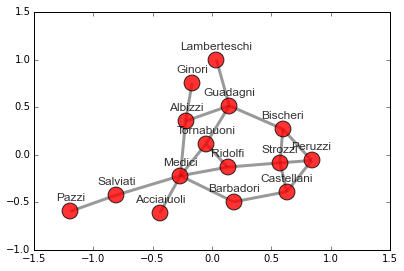

In [2]:
import matplotlib.pylab as plt

import networkx as nx
from annotate_networkx import annotate_with_networkx_labels
G = nx.florentine_families_graph()
# Graphviz version only works if you have graphviz installed.
#pos=nx.graphviz_layout(G,prog='sfdp') 
pos=nx.spring_layout(G) 

# nodes
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=250,
                       alpha=0.8)
# edges
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.4)

# Raise labels so that the vertical center of the text is 12pt above node
text = annotate_with_networkx_labels(G,pos,yoff=13, alpha = .8,
                                     verticalalignment='center')
#plt.show()

In [74]:
plt.show()

## Political blogs example

This example is mostly another example of 
customizing networkx's graph drawing, this time with a larger network.
We first reading the Adamic/Glance political blogs data.  This is raw data and it presents a problem.  If there are links in both directions between a pair of websites, there are 2 edges between the websites, on e in each direction.  This makes the graph what is called a **directed graph**, and many of our analysis tools don't work on directed graphs.  So what we'll do is turn it into an undirected graph to start with.  We'll do this by removing any multiple edges between a pair of nodes, also ruling out the possibility that there could be two edges in the same direction between a given pair (which would give us a **multigraph**).

In [3]:
import networkx as nx
import readwrite_gml

def get_biggest_component (UG):
    components = list(nx.connected_component_subgraphs(UG))
    components.sort(key=lambda x:len(x),reverse=True)
    return components[0]

pb = readwrite_gml.read_gml('polblogs.gml')
done = set()
for (start, end) in pb.edges():
    if start == end:
        pb.remove_edge(start, end)
        continue
    edge_tup = frozenset((start,end))
    if edge_tup in done:
        pb.remove_edge(start, end)
    else:
        done.add(edge_tup)
pb_ug = pb.to_undirected()
big_component = get_biggest_component(pb_ug)
# IF YOU DO THIS, try graphviz directly on the dot file
# for a different looking layout: sfdp -Tpng -opolblogs_sfdp.png polblogs.dot
#nx.write_dot(big_component, 'polblogs.dot')
print 'G: %d nodes  Largest component: %d nodes' % (len(pb.nodes()), len(big_component.nodes()))

G: 1490 nodes  Largest component: 1222 nodes


The key point here is that this is a big graph (nearly 1500 nodes) and it is not completely connected and it is also a multigraph.  The layout algorithms we want to demo below work with undirected simple graphs with no self-loops, so the `for`-loop includes code to take away multiple edges between node-pairs (what makes a graph a multigraph) and self loops. The `networkx` graph method `to_undirected` makes sure we have an undirected graph.

Here it might also be useful to use the boolean keyword *relabel=True* to use the names given
the blog sites on the *label* attribute.  By default `networkx` throws those away and just
uses the *id* attribute as the node name.  For now we don't do this, since we will dispense with any labels in this graph, because of the extra visualization problems labels create.  We next run the  layout algorithm. 

One option that networkx provides is to contract out the drawing work to another node layout program `graphviz`.  The next command tries to use a graphviz implementation of a force-spring layout algorithm, but that will only work if you have graphviz installed.  If you're using graphviz, this step will take a few minutes, so be patient.

In [4]:
import networkx as nx
use_graphviz=False
if use_graphviz:
   pos = nx.graphviz_layout(big_component,prog='sfdp', args="Gmaxiter=50")
else:
    pos = nx.spring_layout(big_component)

`maxiter` explained.  
   `maxiter=val`. Sets the maximum number of iterations used to layout the graph.  50 is the default value.  You can experiment with higher values to see if it helps, but be prepared to wait longer.

`k explained`
     K=val. Sets the default ideal node separation in the layout. 
     
Note that maxiter seems to make a more appreciable difference with `fdp` than it does with `sfdp`.  Both are force-spring based, but `sfdp` operates on the graph at multiple levels.  It is generally recommended for larger graphs like the political blogs graph (1200 nodes).  For more parameters with which to tweak this algorithm, see
     
See http://linux.die.net/man/1/sfdp

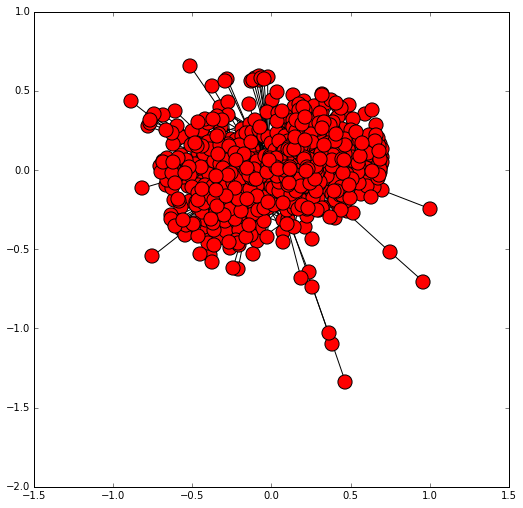

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(big_component,pos=pos,node_size=200)
nx.draw_networkx_edges(big_component,pos=pos)
plt.show()

This does not look quite as well separated as the graph we saw in lecture, produced by Gephi, and that may or may not due to the fact that the default number of iterations is not quite enough with this many nodes (the more iterations, the further apart the nodes fly).  But the liberal and conservative blogs are in fact already quite well separated, as we can see if we add in some coloring.  The classifications of the blog sites into liberal and conservative are stored in the class attribute `value`. So let's use that information to color. The value `1` stands for conservative (color that red) and the value `0` for liberal (color that blue).

In [77]:
color_seq = ('blue','red')
val_seq = (0,1)
cls_attr = 'value'
# dict that maps values onto colors
color_dict = dict(zip(val_seq, color_seq))
# dict with each node attribute [all networkx graphs have this]
node_dict = big_component.node
# List of length n (# nodes) that assigns a color to each node
colorList = [color_dict[node_dict[n][cls_attr]] for n in node_dict.keys()]
plt.figure(figsize=(8,8))
nx.draw(big_component,pos,node_size=200,node_color=colorList)
plt.show()
# An equivalent way of doing it.
#nx.draw_networkx_nodes(big_component,pos=pos,node_color=colorList)
#nx.draw_networkx_edges(big_component,pos=pos)

Another important option is to write a file in a format used by an external drawing program and then use that.  In this case we will use `graphviz` again!  It actually produces a different looking result if called as an external program than if called from within `networkx`.  The following functions allow us to write a `dot` file, the graph format used by `graphviz`.  `networkx` alreay provides a `write_dot` function to do this.  The main issue is to do something nice with the colors that the `dot` format will know what to do with. The `write_color_dot_file` function also provides a facility for deleting an arbitrary attribute (plain `dot` format does something with it we don't want) and suppressing labels (which we definitely DO want in this crowded graph).

In [ ]:
def assign_colors(G, color_att, color_seq=None, val_seq=None, integers_ok=True):
   node_dict = G.node
   val_set = set([node_dict[n][color_att] for n in G.nodes()])
   if color_seq is None and integers_ok:
         # Use integers and default color map
         color_seq = range(len(val_set))
   elif color_seq is None:
         color_seq = ('red','cyan','dimgray','coral','burlywood','ivory','k')
   if val_seq is None:
      val_seq = val_set
   else:
       assert(val_set.issubset(val_seq)), 'Data vals include values not in val_seq'
   assert len(val_seq) <= len(color_seq), \
     'Not enough colors available ({0}) for valueset size ({1}). Specify more.'.format(len(color_seq),
                                                                    len(value_seq))
   return dict(zip(val_seq, color_seq))


def write_color_dot_file (G,color_att, del_atts=None, dot_file='dot_graph.dot',
                          color_seq=None,val_seq=None,label=True):
      if del_atts is None:
         del_atts = []    
      color_dict = assign_colors(G, color_att, color_seq,val_seq,integers_ok=False)
      for (n,ndict) in G.node.iteritems():
          ndict['style'] = 'filled'
          ndict['fillcolor'] = color_dict[ndict[color_att]]
          if not label:
                ndict['label'] = '""' 
          for del_att in del_atts:  
             try:
               del ndict[del_att]
             except KeyError:
               continue
      nx.write_dot(G, dot_file)

In [ ]:
#from drawing_utils import write_color_dot_file
write_color_dot_file (big_component,'value',
                      dot_file='polblogs_colored.dot',label=False,
                      val_seq = (0,1), color_seq=('blue','red'))

You can now run `sfdp` on this graph file and get an image file. 

```
sfdp -Tpng -o polblogs_colored.png polblogs_colored.dot
```

Note this will **only** work if you have installed `graphviz` separately as a program independent from Python.  The graphviz tools are available at [this link](http://www.graphviz.org/).  

The image file produced in in `png` format, which is why we named it `polblogs_colored.png`.  It looks like this:

In [ ]:
from IPython.display import Image
Image(filename='polblogs_colored.png')

The image above clearly has some problems  because the edges are so densely packed in the center that they blot out everything else.  Nevertheless, the separation between the two blogging communities is more visible as the barbell shape in the center.  It is often the case that different imaging programs/algorithms will reveal different aspects of the data you're looking at.  You have to shop around to meet your needs.

## Packaging together the results

Finally for other upcoming assignments, we provide a function from `drawing_utils` that basically does what we did above, draws a graph using standard `networkx` drawing functions, assigning different colors to the different values of the `color_att` that is its second argument. A specific `val_seq` and `color_seq` can be supplied, and in that case `val_seq[i]` gets the color in `color_seq[i]` assigned to it.  So this is how we make sure the liberals get colored blue and the conservatives get colored red.  The graph shown is optionally saved in a file, if a file name is given.

Note:  Executing the code below will compute the layout, which takes a while, so be aware of that before you execute it.

In [ ]:
from drawing_utils import draw_color_graphviz_graph

draw_color_graphviz_graph (big_component,'value', plt_file='n_polblogs_colored.png',label=False,
                           val_seq = (0,1),color_seq=('blue','red'))

## Les Miserables

First lets read in the graph for the characters in Victor Hugo's novel `Les Miserables`,
and do some simple computations.

In [6]:
import networkx as nx
import readwrite_gml
lm = readwrite_gml.read_gml('lesmiserables.gml',relabel=True)
M = nx.betweenness_centrality(lm)
il = M.items()
il.sort(key=lambda x:x[1],reverse=True)
top_chars = il[:10]

## Simple graph attributes and analysis

The `relabel=True` says to use the value of the `label` attribute as the name of the node.  This means each node will have the same name as the character it represents.  If `relabel=False`, the `label` would still be an attribute of each node but each node would have an integer name.  

We have also found the `betweenness` centralities of all the nodes in the graph (line 3)
and created a sorted list of nodes, from highest centrality to lowest, and created a new list `top_chars` with the 10 most central  characters.

In [ ]:
il

The `top_chars` list is interesting and mostly intuitive, except that `Javert`, the policeman who relentlessly tracks `Valjean` and is certainly important, has rather a low betweenness centrality value.  You can look at the graph pictures below and speculate as to why this is.  Readers of the novel might also have some ideas.  It might also point to a problem with `betweeness centrality` as a measure of centrality.

In [7]:
top_chars

[(u'Valjean', 0.5699890527836183),
 (u'Myriel', 0.17684210526315788),
 (u'Gavroche', 0.16511250242584766),
 (u'Marius', 0.13203248862194603),
 (u'Fantine', 0.1296445409881942),
 (u'Thenardier', 0.07490122123424223),
 (u'Javert', 0.05433155966478437),
 (u'MlleGillenormand', 0.047598927875243655),
 (u'Enjolras', 0.0425533568221771),
 (u'Tholomyes', 0.040629348177335795)]

Ths list of characters.

In [ ]:
lm.nodes()

Note the difference between the `node` attribute of a graph and the `nodes` attribute. The `node` attribute gives the characters together with their attributes.  More technically, the node attribute dictionary of the graph:

In [ ]:
lm.node

The attributes a node have include its *id* (a unique identifier integer)  and its label, which
is the character's name.  We are using the character's name as the way of referring to the
node in the graph.  This is why the **keys** of the node dictionary are character names.
The default way to identify a node would be by its *id*, but we indicated we would use the
label attribute (character names) when we specified *relabel=True* in step 18, line 2, when we read in the graoh.

Just as nodes can have attributes, so can edges.  Edges might have attributes like strength (or weight) of connection, color, or type (in a graph whcih represents more than one type of connectedness).  The edge attribute dictionary is found in the `edge` attaribute. In our example that's `lm.edge`:

Look at the dictionary to retrieve node data about that character.

In [ ]:
lm_node_dict = lm.node
lm_node_dict[u'Javert']

Note that edges can also have attributes. in our *Les Miserables* graph, there is a value attribute on each edge, which contains a weight reflecting how frequently the characters connected by the edge have appeared together in scenes.

In [ ]:
lm.edge

In [ ]:
lm.edge['Anzelma']

The attributes an edge have include the *value* attribute.  This is an integer that gives the number
of times two characters appear in a scene together.  Thus the higher the value the more intense
or "weighted" the connection between the two characters is.  We will experiment with
using this attribute in drawing graphs below.

We'll make one dictionary that has edges as keys (represented as pairs of strings) and their weights as values.  We'll use that to sort character relationships by strength:

In [15]:
edge_dict = dict((frozenset((f,s)), d['value']) for (f,fdict) in lm.edge.items() for (s,d) in fdict.items())
edge_dict_il = sorted(edge_dict.items(),key=lambda x: x[1], reverse=True)
edge_dict_il[:5]

[(frozenset({u'Cosette', u'Valjean'}), 31),
 (frozenset({u'Cosette', u'Marius'}), 21),
 (frozenset({u'Marius', u'Valjean'}), 19),
 (frozenset({u'Courfeyrac', u'Enjolras'}), 17),
 (frozenset({u'Javert', u'Valjean'}), 17)]

## Drawing issues

Next we try to draw the `Les Mis` graph, using the tools we used before.

In [16]:
#pos = nx.spring_layout(lm,scale=1.0,iterations=200)
import math
from matplotlib import pyplot as plt
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(lm.nodes())))
#pos = nx.spring_layout(lm,scale=1.0,k=5*default_distance_between_nodes) # Try adjusting default distance between nodes
if use_graphviz:
   pos = nx.graphviz_layout(lm,prog = 'fdp')
else:
   pos = nx.spring_layout(lm)
# Default node size=300, default font_size=12
# nx.draw_networkx(lm,pos, node_size=300, font_size=12)  
# node_size=800,font_size=8
# Try experimenting with node_shape 'D'
nx.draw_networkx(lm,pos, node_size=300, font_size=8)

In [17]:
plt.show()

This graph isnt very pretty to look at.  We're going to try to draw something
better.

We're only going to label subset of the nodes in the final graph (the top characters).  To do
that, we're going to create a dictionary of the nodes we're interested in.  It's going
to map nodes to the labels we want to use.  But the nodes are already represented by the labels
we're interested in, because we read them in with *relabel=True*.  So our new_labels dictionary
is just going to map a node to itself.

In [19]:
new_labels = dict((k,k) for (k,v) in top_chars)
num_nodes = len(lm.nodes())
import math
default_distance_between_nodes = 1.0/(math.sqrt(num_nodes))

In [ ]:
new_labels

In [20]:
import math
from matplotlib import pyplot as plt
from annotate_networkx import annotate_with_networkx_labels
plt.figure(figsize=(12,8))
#pos = nx.spring_layout(lm,scale=1.0) # The default scale is 1.0
default_distance_between_nodes = 1.0/(math.sqrt(len(lm.nodes())))
if use_graphviz:
    pos = nx.graphviz_layout(lm,scale=1.0,prog='fdp',args="K={0}".format(5*default_distance_between_nodes))
else:
    pos = nx.spring_layout(lm,scale=1.0,k=5*default_distance_between_nodes)
#pos = nx.spring_layout(lm,scale=1.0,k=2*default_distance_between_nodes) # Try adjusting default distance between nodes
#pos = nx.spring_layout(lm,scale=.75) # Try tweaking the scale and adjusting node positions.
#pos = nx.spring_layout(lm,scale=1.0,weight='value') # Try increasing spring tension for chars with more scenes together
#pos = nx.spring_layout(lm,scale=1.0,weight='value') # Try increasing spring tension for chars with more scenes together
nx.draw_networkx_edges(lm,pos, edge_color='blue',alpha=.3)  #Default node size=300
nx.draw_networkx_nodes(lm,pos,node_color='blue',node_size=100)
nx.draw_networkx_nodes(lm,pos,new_labels,node_color='red',node_size=300)
#l = nx.draw_networkx_labels(lm,pos,new_labels,font_size=10,font_color='black')
# Raise labels so that bottom is 7pt above node
text = annotate_with_networkx_labels(lm,pos,labels=new_labels,yoff=9, alpha = .9,
                                     font_size=10,verticalalignment='bottom')

In [21]:
plt.show()

First we draw the graph with no labels and small nodes.  Then in line 7 we add labels **only** for the top characters.  Then
in line 8 we resize the top character nodes and make them red.  This sequence of code is a very useful model.  When you want to
do something special to a subset of the nodes, draw the background graph first, choosing parameters to make the background
nodes less visually salient.  Then tweak/create the labels with *networkx_draw_labels* for that subset of the nodes you want to foreground
(using a dictionary like *new_labels* that maps from nodes to their new labels).  Some foregrounding operations (such as tweaking node size)
require you to redraw a subset of the nodes using *draw_networkx_nodes*.
To just draw edge labels instead of node labels, you would use *draw_networkx_edge_labels*.  The dictionary now needs to contains edges as keys, and edges are referred to by using the pair of nodes they connect.

## Using graphviz externally ( an easier road)

Most of the visualization problems with the graphs above have to do with label placement, the simple tedious issue of sizing and placing the labels so that they don't overlap with each other or with the nodes.  The standard `Networkx` drawing tools don't address this issue, so that with complicated graphs with long labels (like person names), the results can range from hard to read to useless.  The issue of label placement is, like many drawing issues, basically impossible to give a general solution for, but many graphs visualization programs do get pretty decent results just by tweaking label placements so that they cover as little as possible.  The popular `graphviz` program is one of those programs. Above in the Polblogs example, we showed how to use `graphviz` externally by producing a `dot` format file.

For those who have installed `graphviz`, this turns out to be a pretty decent solution for the `Les Mis` graph.

In [ ]:
if use_graphviz:
   from drawing_utils import write_color_dot_file
   #Make a dot file
   write_color_dot_file (lm, node_color='red', dot_file='lesmis_one_color.dot')

You can now run `sfdp` on this graph file and get a pretty decent image.  The command is:

```
sfdp -Tpng -o lesmis_one_color.png lesmis_one_color.dot
```

The image produced by running that line looks like this, a considerable improvement in readability.

In [ ]:
from IPython.display import Image
Image(filename='lesmis_one_color.png')

## Hand labeling

The next version of the `Les Mis` graph is the one that takes the most work.  All labels are drawn, and their positioning with respect to the node is specified on a node-by-node basis.  This will produce the best-looking result that loses no information, and for some purposes (important reference diagram in a paper) is worth the work.

In [27]:
from drawing_utils import annotate_with_networkx_labels
import math

plt.figure(figsize=(11,11))
#lm = lm.to_undirected()
#default_distance_between_nodes = 1.0/(math.sqrt(len(lm.nodes())))
#pos = nx.spring_layout(lm,scale=1.0,k=6*default_distance_between_nodes) # Try adjusting default distance between nodes
if use_graphviz:
   pos = nx.graphviz_layout(lm,prog = 'sfdp')
else:
   pos = nx.spring_layout(lm)
# Default node size=300, default font_size=12
nx.draw_networkx_nodes(lm,pos,
                       node_color='r',
                       node_size=220,
                       alpha=0.9)
# edges
nx.draw_networkx_edges(lm,pos,width=.8,alpha=0.3)

# Offset units are pts (1/72in), so pretty small.
offset_dict = dict(Napoleon = (-17,8),
                   Geborand = (-38,-5),
                   Champtercier = (-42,2),
                   Count = (-24,0),
                   CountessDeLo = (-49,-5),
                   Cravatte = (-30,-5),
                   Child1 = (-27,-5),
                   Child2 = (24,0),
                   Scaufflaire = (-36,-4),
                   MotherInnocent = (-50,-5),
                   Blacheville = (-37,-7),
                   Bamatabois  = (14,4),
                   Fameuil = (-33,-4),
                   Zephine = (29,-7),
                   Favourite = (0,-17),
                   Marguerite = (0,-17),
                   Gervais = (-7,-17),
                   MmeDeR = (-36,-5),
                   Listolier = (0,10),
                   Dahlia = (26,0),
                   MmeMagloire =(-45,-4),
                   Champmathieu = (-45,-4),
                   Labarre = (-30,-7),
                   Isabeau = (-30,-4),
                   Judge = (0,8),
                   Cochepaille = (-1,-17),
                   Brevet = (-26,-4),
                   #Chenildieu = (14,8),
                   Chenildieu = (24,0),
                   Pontmercy = (36,-4),
                   MmePontmercy = (49,-4),
                   Boulatruelle = (39,-4),
                   BaronessT = (39,-4),
                   Woman1 = (0,8),
                   Woman2 = (0,8),
                   Anzelma = (19,9),
                   Gillenormand = (8,8),
                   LtGillenormand = (0,8),
                   MlleGillenormand = (-30,-4),
                   Simplice = (0,8),
                   Valjean = (-5,8),
                   Javert = (6,-16),
                   Toussaint = (-20,-9),
                   Marius = (15,8),
                   Cosette = (-16,-4),
                   MmeThenardier = (23,0),
                   Claquesous = (-20,0),
                   Gueulemer  = (-17,0),
                   Montparnasse = (-13,3),
                   Babet = (16,0),
                   Eponine = (26,2),
                   Brujon = (-20,4),
                   MmeHucheloup = (24,2),
                   Enjolras  = (-18,-4),
                   Bossuet = (-16,-4),
                   Gavroche = (-29,0),
                   Joly = (0,-18),
                   Mabeuf = (26,-4),
                   Combeferre = (-18,5),
                   Bahorel = (24,-4),
                   Feuilly = (18,5),
                   Prouvaire = (-10,8),
                   Grantaire = (4,8),
                   Courfeyrac = (-8,-14)
                  )
## To further help fit labels into the layout, we abbreviate some of them.
labels = dict((n,n) for n in lm.nodes())
labels['Bamatabois'] = 'Bam'
labels['Chenildieu'] = 'Chdieu'
labels['LtGillenormand'] = 'LtGille'
labels['MlleGillenormand'] = 'MlleGille'
labels['Gillenormand'] = 'Gille'
labels['Woman1'] = 'W1'
labels['Woman2'] = 'W2'
labels['Montparnasse'] = 'MtP'
labels['Cochepaille'] = "C'paille"
labels['MmeThenardier'] = 'MmeT'
labels['Thenardier'] = 'Then'
labels['Toussaint'] = 'Tous'
labels['Cosette'] = "Cte"
labels['Claquesous'] = "Clqss"
labels['MlleBaptistine'] = 'MmeB'
labels['Gueulemer'] = 'Gm'
labels['Babet'] = 'Bbt'
labels['MmeHucheloup'] = 'MmeH'
labels['Enjolras'] = 'Enj'
labels['Bossuet'] = 'Boss'
labels['Courfeyrac'] = 'Cr'
labels['Combeferre'] = 'Cbfr'
labels['Prouvaire'] = 'Prvr'
labels['Grantaire'] = 'Grtr'
# Raise labels so that bottom is 8 pt above node
text = annotate_with_networkx_labels(lm, pos, labels=labels, yoff=8, alpha = .8,
                                     verticalalignment='bottom',
                                     offset_dict = offset_dict)

In [28]:
plt.show()

## Adding Communities

In this section we look at community discovery algorithms and how to draw their results.  Let's first use
the karate club example:

In [2]:
import networkx as nx
kn = nx.karate_club_graph()
#kn.remove_nodes_from([32,33])
node_dict = kn.node
# Adding community coloring to the above graph.
from community_jolleycraig import detect_communities,split_communities,new_draw_nodes

We run the algorithm to produce only TWO communities (by using split_communities).  The code adds a community attribute to each node, telling us which of the two community it's in.

In [30]:
split_communities(kn)

(0.37179487179487181,
 [[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
  [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21]])

We look at the results below, establishing that for the most part, community 1 is club Mr. Hi, and community 0 is club Officer.  

In [1]:
kn.node

Next we add a new attribute `purity` recording whenever a node in community 0 or 1 does not belong to its default club by assigning that node the `purity` value 2. Otherwise the `purity` value is the same as community value.

Note: if you don't have `graphviz` installed, set `use_graphviz` to `False` in the following cell.  Th egraphviz layouts seem to look slightly better, but everything works fine without them.

In [33]:
default = {1:'Mr. Hi',0:'Officer'}
for n in kn.nodes():
    com = kn.node[n]['Community']
    if kn.node[n]['club'] <> default[com]:
        kn.node[n]['Purity'] = 2
    else:
        kn.node[n]['Purity'] = com
kclub_color_dict, kpos = new_draw_nodes(kn,"karate_club.png", cls_attr = 'Community', 
                                         prog='fdp',color_seq=['Cyan', 'Gold','Ivory'], with_labels = True, 
                                         show = True, use_graphviz=use_graphviz)
kclub_color_dict1, kpos1 = new_draw_nodes(kn,"karate_club_purity.png", cls_attr = 'Purity', 
                                         prog='fdp',color_seq=['Cyan', 'Gold','Ivory'], with_labels = True, 
                                         show = True,use_graphviz=use_graphviz)

We see that nodes 8 and 9 have been 'misclassified'.

==============================================================================================

In the next example, we look for communities in the `Les Mis` graph using a community detection algorithm.  To make that convenient we'll define `draw_color_graphviz_graph`, a function which basically combines many of the features we've illustrated above and allows color specifications to be passed in, much as we did in the Polblogs example.  This function is actually available for you to import from the `drawing_utils` module (and was used above in the Polblogs example).  Here we define it so that we can illustrate that it basically just pulls together the strategies we have described above.

The `draw_color_graphviz_graph` function is for networkx graphic visualizations of graphs with a coloring attribute, which can either be assigned by some class attribute in the data or by an attribute assigned by a community detection program.  We allow label positions to be fine-tuned with an offset dictionary by calling the function `annotate_with_networkx_labels` discussed above, and we can pass in the layout and node positions defined above when we use the functions. Notice that it uses the same function `assign_colors` used for coloring the polblog graph.

In [38]:
def assign_colors(G, color_att, color_seq=None, val_seq=None, integers_ok=True):
   node_dict = G.node
   val_set = set([node_dict[n][color_att] for n in G.nodes()])
   if color_seq is None and integers_ok:
         # Use integers and default color map
         color_seq = range(len(val_set))
   elif color_seq is None:
         color_seq = ('red','cyan','dimgray','coral','burlywood','ivory','k')
   if val_seq is None:
      val_seq = val_set
   else:
       assert(val_set.issubset(val_seq)), 'Data vals include values not in val_seq'
   return dict(zip(val_seq, color_seq))
   
def draw_color_graphviz_graph (G, color_att, pos=None, labels=None, prog='sfdp',
                               offset_dict=None, yoff=8, plt_file=None,
                               node_size=220, node_alpha=.9, label_alpha=.8, edge_alpha = .3,
                               node_color = None, color_seq=None, val_seq=None, label=True,
                               use_graphviz=False):
   """
   node_color can be a be a color string spec; if it is, all nodes get that color.
   """
   node_dict  = G.node
   if node_color is None:
      color_dict = assign_colors(G, color_att, color_seq,val_seq)
      # List of length n (# nodes) that assigns a color to each node
      colorList = [color_dict[node_dict[n][color_att]] for n in G.nodes()]
   else:
      ColorList = node_color
   plt.figure(figsize=(11,11))
   if pos is None and use_graphiviz:
       pos = nx.graphviz_layout(lm,scale=1.0)
   elif pos is None:
       pos = nx.spring_layout(lm,scale=1.0)
   nx.draw_networkx_nodes(G,pos,
                          node_color=colorList,
                          node_size=node_size,
                          alpha=node_alpha)
   nx.draw_networkx_edges(G,pos,width=.8,alpha=edge_alpha)
   if label:
     annotate_with_networkx_labels(G,pos,labels=labels,yoff=yoff, alpha = label_alpha,
                                    verticalalignment='bottom', offset_dict = offset_dict) 
   if plt_file:
      plt.savefig(plt_file)

In the next cell we add information to graph, assigning a community to each node using Mark Newman's spectral community detection algorithm. 

In [36]:
# Adding community coloring to the above graph.
from community_jolleycraig import detect_communities
import networkx as nx
import readwrite_gml
lm = readwrite_gml.read_gml('lesmiserables.gml',relabel=True)
labels = dict((n,n) for n in lm.nodes())
# This code adds a community attribute to each node, telling us what community it's in.
detect_communities(lm)

(0.54434558869117733,
 [[u'Child1',
   u'Child2',
   u'Courfeyrac',
   u'Mabeuf',
   u'Gavroche',
   u'BaronessT',
   u'MmeBurgon',
   u'Prouvaire',
   u'Marius',
   u'Joly',
   u'Enjolras',
   u'Grantaire',
   u'Feuilly',
   u'Jondrette',
   u'Bossuet',
   u'Bahorel',
   u'MmeHucheloup',
   u'Combeferre',
   u'MotherPlutarch'],
  [u'Champtercier',
   u'OldMan',
   u'Napoleon',
   u'Myriel',
   u'Count',
   u'CountessDeLo',
   u'Geborand',
   u'Cravatte'],
  [u'Judge',
   u'Bamatabois',
   u'Chenildieu',
   u'Brevet',
   u'Champmathieu',
   u'Cochepaille'],
  [u'Perpetue',
   u'Blacheville',
   u'Listolier',
   u'Marguerite',
   u'Favourite',
   u'Tholomyes',
   u'Dahlia',
   u'Simplice',
   u'Fantine',
   u'Zephine',
   u'Fameuil'],
  [u'MlleBaptistine',
   u'MlleVaubois',
   u'Magnon',
   u'Pontmercy',
   u'MmeDeR',
   u'MlleGillenormand',
   u'Cosette',
   u'Woman2',
   u'MotherInnocent',
   u'Isabeau',
   u'Fauchelevent',
   u'Scaufflaire',
   u'Toussaint',
   u'Labarre',
   u'Gerv

Each community assignment is stored in a node attribute `Community`, so we can see how many communities were found by collecting the community value for each node, and looking at the **set** of communities found.

In [ ]:
coms = set(lm.node[n]['Community'] for n in lm.nodes())
coms

In the next cell we give code for redrawing the graph above coloring the nodes by community. We then draw the resulting graph using `draw_color_graphviz_graph `.  Notice how Newman's algorithm finds the Myriel and Fantine communities of the novel, as well as communities centered round Valjean (the hero) and Javert (the policeman who relentlessly tracks him through the book). So how is it that `draw_color_graphviz_graph` can use the same function `assign_colors` as we did for coloring the polblog graph? The color assignment code simply looks for a node attribute `Community` instead of a node attribute `value` when assigning a color.

In [39]:
import matplotlib.pyplot as plt
from drawing_utils import annotate_with_networkx_labels
from offset_dict import offset_dict

plt.figure(figsize=(11,11))
#lm = lm.to_undirected()
#default_distance_between_nodes = 1.0/(math.sqrt(len(lm.nodes())))
#pos = nx.spring_layout(lm,scale=1.0,k=6*default_distance_between_nodes) # Try adjusting default distance between nodes
pos = nx.graphviz_layout(lm,prog = 'sfdp')
# Draw a pyplot version of the graphviz graph using layout,labels,label offsets computed above.
draw_color_graphviz_graph (lm,'Community',pos=pos,labels=labels,
                           offset_dict = offset_dict,
                           yoff=8,
                            plt_file = 'lesmis_communities.png',
                            color_seq = ('red','cyan','dimgray','coral','burlywood','ivory'),
                            use_graphviz=use_graphviz)

In [40]:
plt.show()

We can also use `write_color_dot_file` (introduced above for the political blogs example) to show the community colors, since it uses `assign_colors` in exactly the same way.  In this case we make use of the default coloring sequence instead of passing in our own.

In [41]:
# Adding community coloring to the above graph.
from community_jolleycraig import detect_communities
detect_communities(lm)

#Make a dot file
write_color_dot_file (lm, 'Community', dot_file='lesmis.dot')

NameError: name 'write_color_dot_file' is not defined

The image produced looks like this:

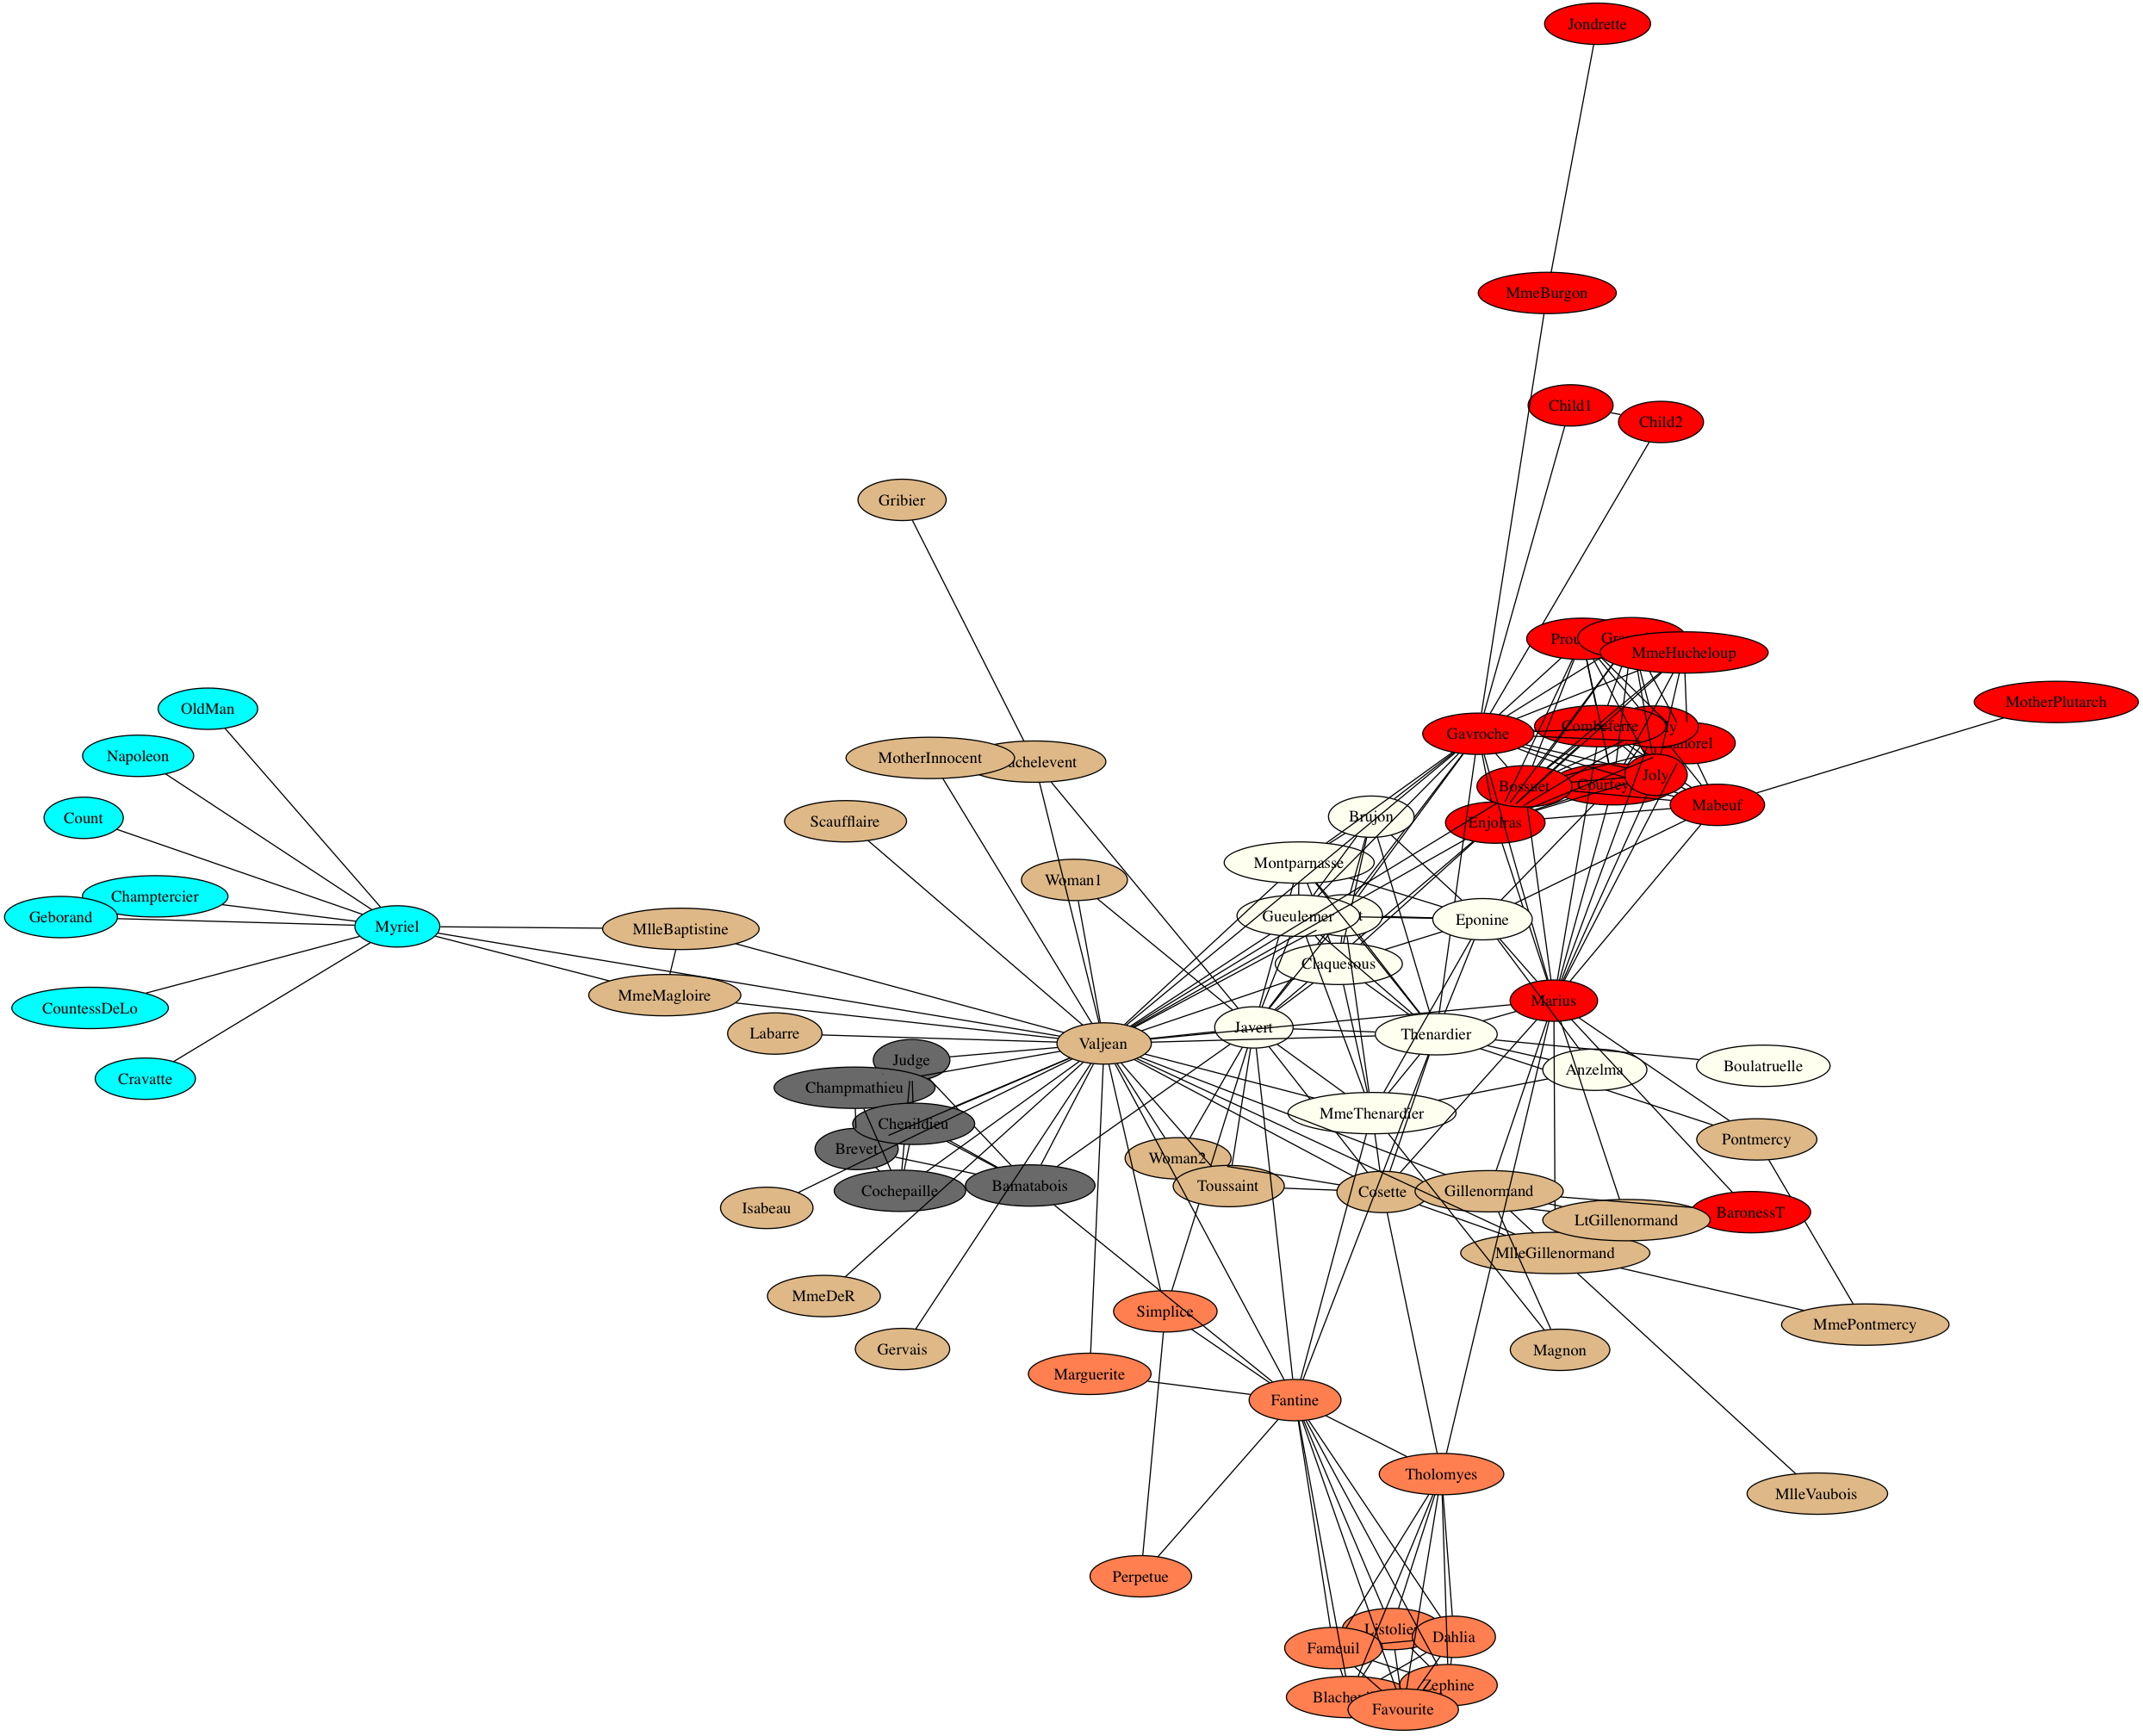

In [42]:
from IPython.display import Image
Image(filename='lesmis.png')

## Anna Karenina (homework assignment)

Read in the graph for *Anna Karenina* (AK).  Follow the
model used in analyzing *Les Miserables* above.  As part of the assignment, you will have to draw
a graph for AK that labels only the top 10 most
central characters, colors the nodes differently, and makes
the nodes a different size.  Use the model of *Les Miserables* (above) to help.


In [1]:
import networkx as nx
import readwrite_gml
ak = readwrite_gml.read_gml('anna.gml',relabel=True)

In [ ]:
ak.edge.items()

In [2]:
edge_dict = dict((frozenset((f,s)), d['value']) for (f,fdict) in ak.edge.items() for (s,d) in fdict.items())
edge_dict_il = sorted(edge_dict.items(),key=lambda x: x[1], reverse=True)
edge_dict_il[:5]

[(frozenset({u'AN', u'VR'}), 27.2),
 (frozenset({u'KI', u'LE'}), 22.53),
 (frozenset({u'LE', u'ST'}), 17.72),
 (frozenset({u'KO', u'LE'}), 14.25),
 (frozenset({u'AL', u'AN'}), 13.33)]

For those trying to answer questions about the relationship of the graph to the plot, it will
help to have the full spellout of what the two-character node names mean.  Here is how to
look at that.

In [ ]:
desc_dict = ak.node
for ch in sorted(ak.nodes()):
    print '%5s %s' % (ch, desc_dict[ch]['desc'])

It will also be helpful to know how to get the attributes of any character.

In [ ]:
ak_network_node_dict = ak.node
ak_network_node_dict[ak.nodes()[0]]

## Playing with your Facebook ego network

For this exercise, I assume you've successfully downloaded some Facebook ego network and (optionally) anonymized it. In the code
below I refer to the file containing that graph as `personal_ego_network_anon.gml`.  An example of such a network has been included in the zipfile with which this notebook is distributed.

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import readwrite_gml
ego_network = readwrite_gml.read_gml('personal_ego_network_anon.gml',relabel=True)

If you don't use the default `draw_networkx` function, it's because you want control over some aspect of the
display (coloring, node size, whether edges are shown, etcetera).  In that case you do the drawing in
three phases:

1. draw the nodes
2. draw the edges
3. add the labels.  

Of course any of these 3 phases can be skipped, in order to highlight
some particular aspect f the graph. In the next drawing we just do the nodes
and edges.

In [ ]:
ego_pos = nx.spring_layout(ego_network,scale=1.0)
#nx.draw_networkx(ego_network,ego_pos)
nx.draw_networkx_edges(ego_network,ego_pos)
nx.draw_networkx_nodes(ego_network,ego_pos)
# Remove the comment character on the next line to get labels
# nx.draw_networkx_labels(ego_network,ego_pos)
# If running without the pylab flag, or matplotlinb inline,
# uncomment the next line.
#plt.show()

In [ ]:
import networkx as nx
from girvan_newman import girvan_newman, relabel_partition
partition = girvan_newman(ego_network, create_partition=True,relabel_partition_flag=True)

Retrieving data for a particular node

In [ ]:
ego_network_node_dict = ego_network.node
ego_network_node_dict[ego_network.nodes()[0]]
#ego_network_node_dict[ego_network.nodes()[0]]['label']

Printing network with customized labels.  Here we choose a style for labels, specifying boxstyle, foreground color,
and transparency. We use the node's label for the text to label the node with.

In [ ]:
ego_pos = nx.spring_layout(ego_network,scale=1.0)
# The default way to draw.  Takes care of edges, nodes, and (by default) labels.
#nx.draw_networkx(ego_network,ego_pos)
#  Control your own drawing specs.
nx.draw_networkx_edges(ego_network,ego_pos)
nx.draw_networkx_nodes(ego_network,ego_pos)
for label, (x,y) in ego_pos.items():
    plt.text(x, y, label,
             bbox = dict(boxstyle = 'round,pad=0.15', fc = 'salmon', alpha = .5))
#plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import readwrite_gml
ego_network = readwrite_gml.read_gml('personal_ego_network_anon.gml',relabel=True)

In [ ]:
import math
default_distance_between_nodes = 1/math.sqrt(len(ego_network.nodes()))
ego_pos = nx.spring_layout(ego_network,scale=1.0,k=1*default_distance_between_nodes,iterations=50)

#nx.draw_networkx_edges(ego_network,ego_pos)
#nx.draw_networkx(ego_network,ego_pos)
import math
default_distance_between_nodes = 1/math.sqrt(len(ego_network.nodes()))
nx.draw_networkx_edges(ego_network,ego_pos)

In [ ]:
plt.show()

In [ ]:
ego_pos = nx.spring_layout(ego_network,scale=1.0,iterations=25)
nx.draw_networkx_edges(ego_network,ego_pos)
nx.draw_networkx_nodes(ego_network,ego_pos)
selected = [u'Dares', u'Cleitus',u'Hippodamus_2',]
for label, (x,y) in ego_pos.items():
    if label in selected:
      plt.text(x, y, label,
               bbox = dict(boxstyle = 'round,pad=0.15', fc = 'salmon', alpha = .5))
plt.show()

In [ ]:
sorted(ego_network.nodes())

To discover the number of connected pieces in your Facebook network, do this.

In [ ]:
nx.number_connected_components(ego_network)

## Making your network nodes clickable

The following tool is from http://wiki.scipy.org/Cookbook/Matplotlib/Interactive_Plotting.
But don't download that version.  Use th version distributed with this notebook.  If that's unavailable, download this version 

http://www-rohan.sdsu.edu/~gawron/python_for_ss/course_core/code/mouse_click_node_namer.py
    
which has a couple of key modifications.

You also need to put it in your ipython notebook
directory and name the file "mouse_click_node_namer.py" before the following code will work.  
Run the code below (Shift-enter). After the graph is drawn, click on a node to make the label appear.  Click again to turn it off. 
Turn on as many labels as you like. Save an image.  It may take a few tries to get your mouse point directly over some nodes,
but with a little practice it should get easier.  Another visual issue is that sometimes, when lines cross, you may think
there is a node when actually there isn't.  In that case, all the clicking in the world won't help.

Note the clickable version of the graph ONLY works in the matplotlib
GUI.   So you have to restart your notebook after commenting out
the %matplotlib inline magic command in the first cell (Click `File>Save`,
`File>Close and halt`, restart). Mac Users 
will need to execute the code snippet changing backends.  Finally,
if you're switching from inline to GUI or if you started up 
without the pylab flag, you need to execute the `plt.show()` command
to pop up the GUI.

In [ ]:
import mouse_click_node_namer
import networkx as nx
import matplotlib.pyplot as plt
import pylab
import readwrite_gml
ego_network = readwrite_gml.read_gml('personal_ego_network_anon.gml', relabel=True)

ego_pos = nx.spring_layout(ego_network,scale=1.0)
ego_il = ego_pos.items()

labels = [label for (label,coords) in ego_il]
X = [x for (label,(x,y)) in ego_il]
Y = [y for (label,(x,y)) in ego_il]
     

# An alternative is to draw just the edges.  The nodes are still clickable, but harder to find.
#nx.draw_networkx_edges(ego_network,ego_pos)
nx.draw_networkx(ego_network,ego_pos, with_labels=False,node_size=20,node_color="lightgray") 
af =  mouse_click_node_namer.AnnoteFinder(X,Y, labels)
pylab.connect('button_press_event', af)

In [ ]:
plt.show()